In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math as mp
import openpyxl
import statistics
from scipy.optimize import curve_fit 

In [3]:
import sys
sys.path.insert(0, r".\Functions")
sys.path.insert(1, r".\Functions")
sys.path.insert(2, r".\Functions")
sys.path.insert(3, r".\Functions")
sys.path.insert(4, r".\Functions")
sys.path.insert(5, r".\Functions")
sys.path.insert(6, r".\Functions")
#r"C:\Users\MI\TechProm-AKS\Расчет крыла\UniForce\Functions"

In [4]:
"Библиотека с построением распределений"
#importlib.reload(dl)
import distribution_lib as dl

In [5]:
"Библиотека с поиском центра давлений методом трапеций"
#importlib.reload(lsfl)
import LeverSystemForce_Library as lsfl

In [6]:
"Библиотека с построением поверхности распределения давления"
#importlib.reload(sf)
import surf_func as sf

In [7]:
"Библиотека с построением Qy и Mz"
#importlib.reload(qmf)
import Qy_Mz_functions as qmf

In [36]:
"Библиотека с построением распределения масс с учетом инерции"
importlib.reload(md)
import mass_distribution as md

In [9]:
"Библиотека с нахождением центра приложения усилий"
#importlib.reload(cf)
import center_force as cf

In [10]:
"Библиотека с поиском нагрузки на лямку"
#importlib.reload(ofos)
import Optimize_force_on_straps as ofos

In [23]:
"Библиотека с расчетом геометрии"
importlib.reload(gl)
import Geometry_for_time as gl #geom_lib in future

In [12]:
import importlib #для отладки
"""importlib.reload("module_name")"""

'importlib.reload("module_name")'

In [13]:
PK, BK, F, B = gl.geometry('Крыло','z', 'x')
start_ord, finish_ord = gl.boundary_points(F, B, 'z')
#print(start_ord, finish_ord)

[[0.0, 0.0, 780.0, 'front', '1'], [0.0, 0.0, 4558.0, 'front', '2'], [824.0, 0.0, 8270.0, 'front', '3']]


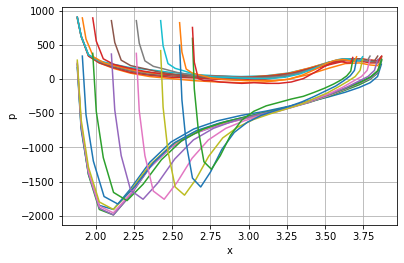

In [14]:
#строим распределение давление от x по всем заданным сечениям
z_w, b, c, hy, pds_p, z, hy = dl.general_dist()

[0.78, 0.965, 1.533, 2.165, 2.761, 3.522, 4.326, 4.953, 5.672]


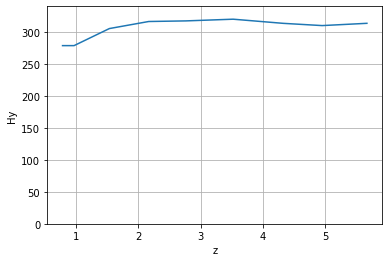

In [14]:
#строим распределение Hy по закрылку
z_zakr, hy_zakr = dl.zakr_dist(z_w, b, c, pds_p, z)

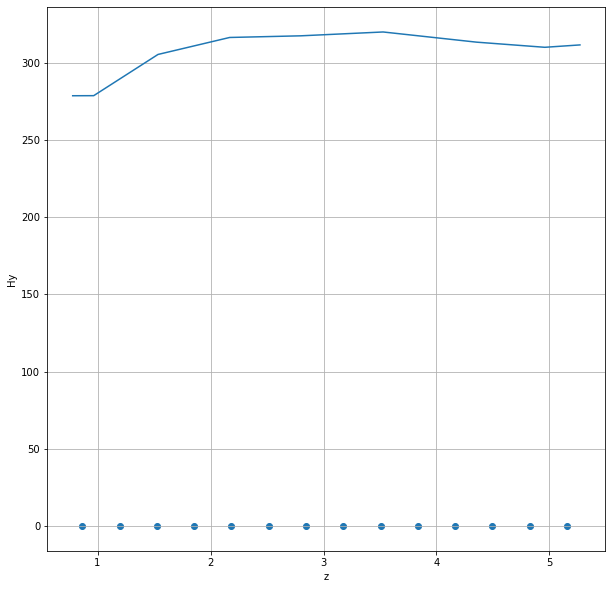

right_result  0  :  0.174834964076383
right_result  1  :  0.477090728893420
right_result  2  :  0.190464815341724
right_result  3  :  0.461219307189580
right_result  4  :  0.207692100959252
right_result  5  :  0.442731405654639
right_result  6  :  0.230347733203949
right_result  7  :  0.416082291336051
right_result  8  :  0.261697053824859
right_result  9  :  0.380265419210210
right_result  10  :  0.303010076124826
right_result  11  :  0.333762484242237
right_result  12  :  0.331534407768057


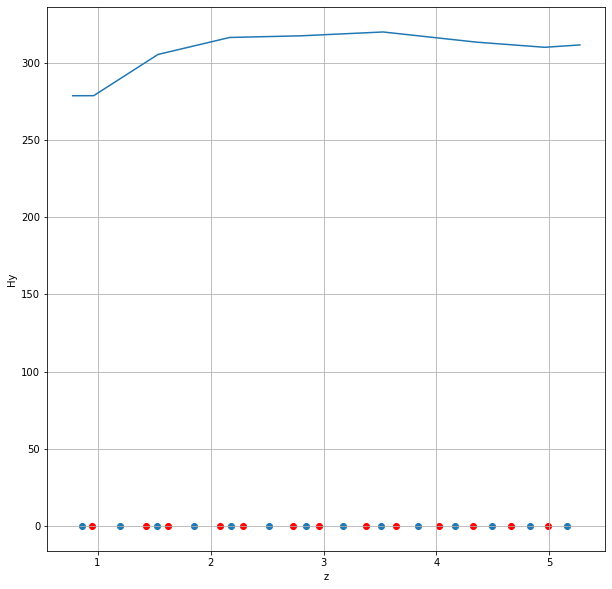

In [22]:
#находим площади, на которые действует давление по закрылку
delta_z_zakr = lsfl.uni_delta_z_func(z_zakr, hy_zakr, 'Координаты лямок.xlsx', 'Закрылок', 0.75, 5.27)

[4.953, 5.672, 6.415, 7.135, 7.702, 8.081, 8.27]
0.512000000000000
0.484438466711500
0.429975117686618
0.377197713517149
0.335635507733692
0.307854068594486
0.294000000000000


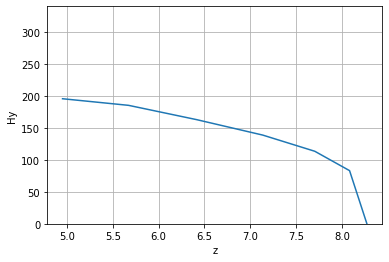

In [15]:
#строим распределение Hy по элерону
z_eler, hy_eler, points = dl.eler_dist(z_w, b, c, pds_p, z)

[[1530.0, 0.0, 5270.0, 'front', '1'], [1530.0, 0.0, 8270.0, 'front', '2']]
True


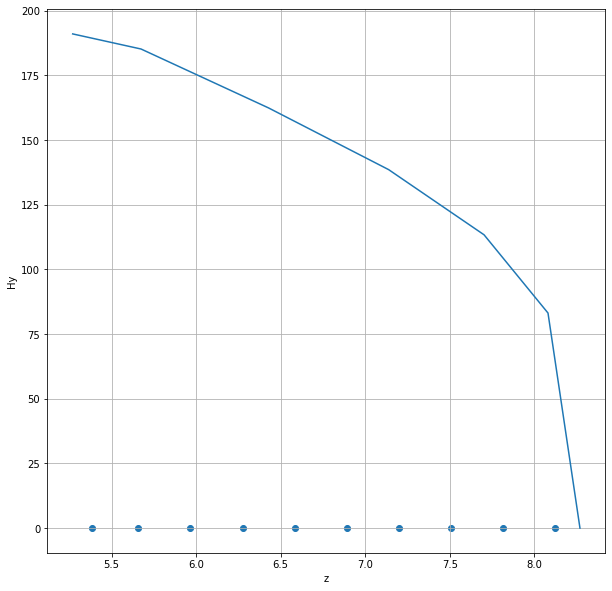

right_result  0  :  0.244346439590677
right_result  1  :  0.282044958360930
right_result  2  :  0.331108973298788
right_result  3  :  0.287895731523398
right_result  4  :  0.324636662178156
right_result  5  :  0.291510695682620
right_result  6  :  0.320809274388565
right_result  7  :  0.292601824397692
right_result  8  :  0.312098048995301


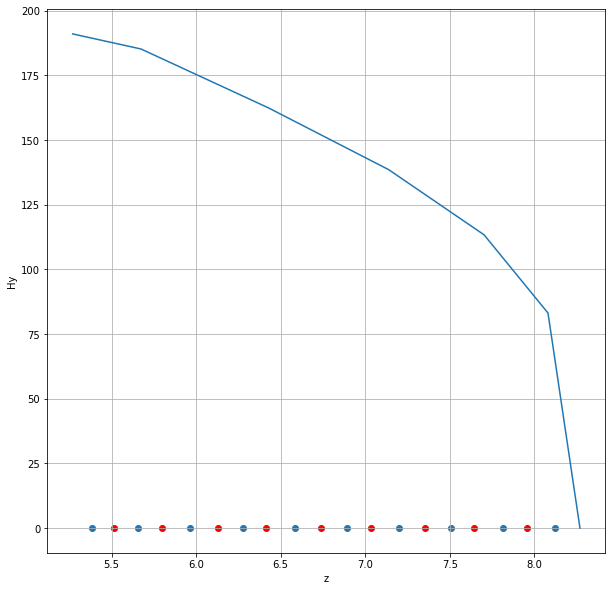

In [16]:
#находим площади, на которые действует давление по элерону
PK_elem, BK_elem, F_elem, B_elem = gl.geometry('Элерон', 'z', 'x')
start_ord_elem, finish_ord_elem = gl.boundary_points(F_elem, B_elem, 'z')
delta_z_eler = lsfl.uni_delta_z_func(z_eler, hy_eler, 'Координаты лямок.xlsx', 'Элерон', round(start_ord_elem/1000, 2), round(finish_ord_elem/1000, 2))
#delta_z_eler = lsfl.uni_delta_z_func(z_eler, hy_eler, 'Координаты лямок.xlsx', 'Элерон', 5.27, 8.27)

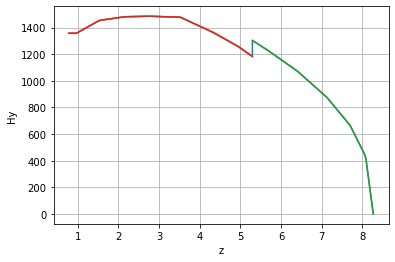

In [25]:
#строим распределение Hy по кессону
len_zakr=4.515
len_eler=2.974
z_kes, hy_kes = dl.kes_dist(z_w, b, c, pds_p, z_zakr, hy_zakr, len_zakr, z_eler, hy_eler, len_eler, z, hy)

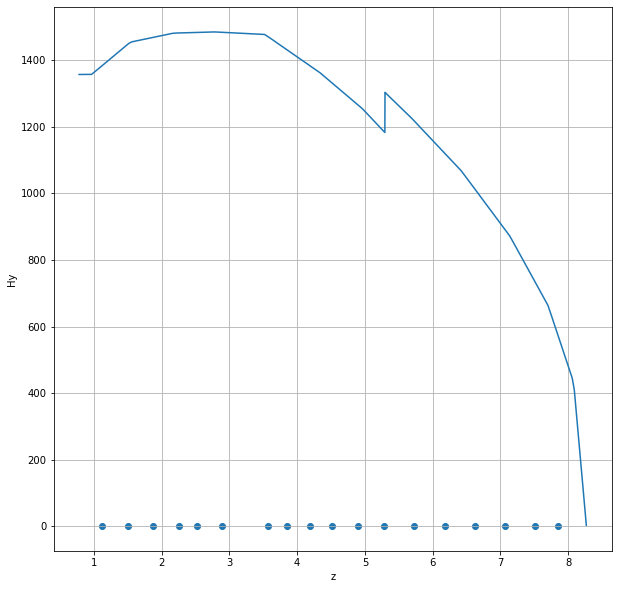

right_result  0  :  0.664000000000001
right_result  1  :  0.166584321647058
right_result  2  :  0.466426058278372
right_result  3  :  0.322284847376758
right_result  4  :  0.244673827154617
right_result  5  :  0.499332596351238
right_result  6  :  0.677392467869685
right_result  7  :  0.0763609097653166
right_result  8  :  0.475261772261308
right_result  9  :  0.281842305061908
right_result  10  :  0.422297241231447
right_result  11  :  0.402083090052366
right_result  12  :  0.489256446627407
right_result  13  :  0.412853365995585
right_result  14  :  0.466772985857258
right_result  15  :  0.434241875874068
right_result  16  :  0.404043273122927


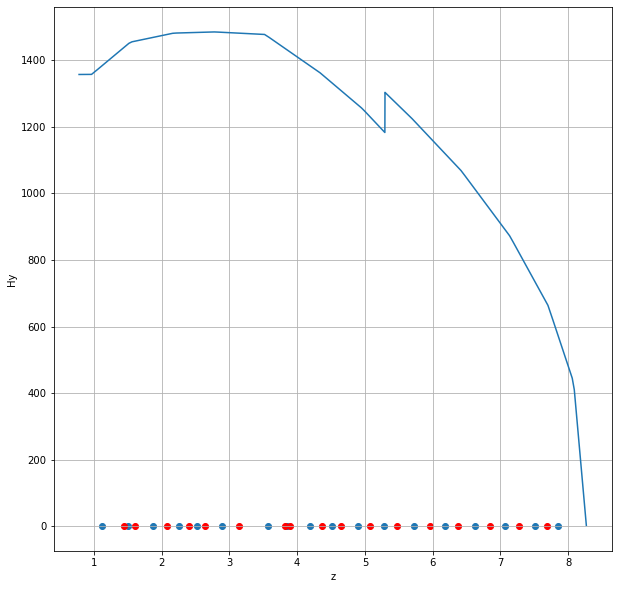

In [28]:
#находим площади, на которые действует давление по кессону
delta_z_kes = lsfl.uni_delta_z_func(z_kes, hy_kes, 'Координаты лямок.xlsx', 'Кессон', 0.75, 8.27)

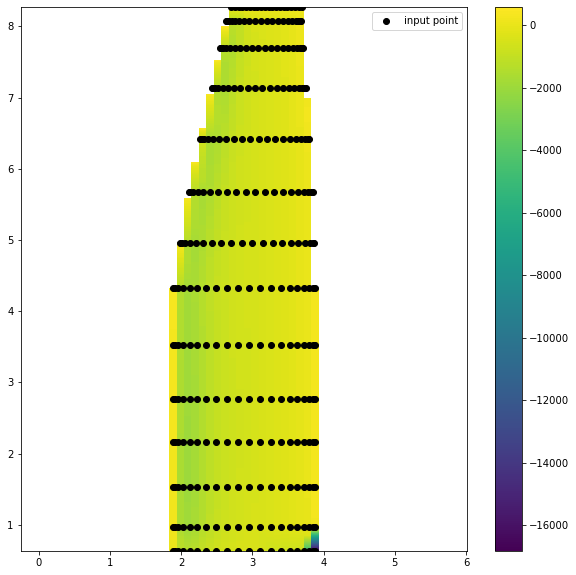

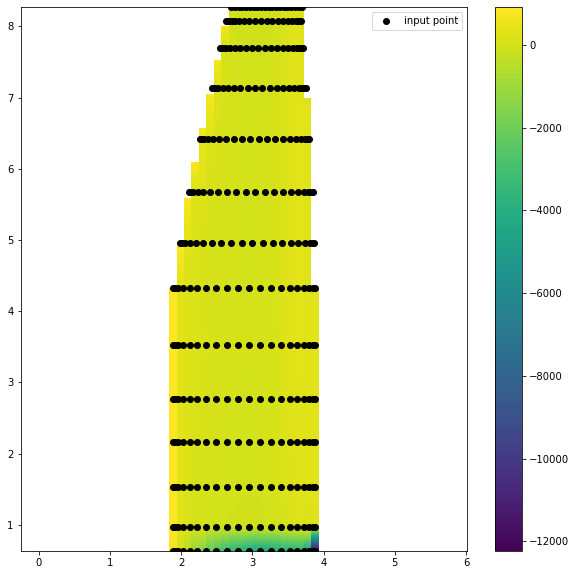

In [17]:
#строим поверхность, отражающую распределение давления на крыло. Сначала сверху, затем снизу
sf.MakingSurface('Координаты лямок.xlsx', 'распределение Аштрих.xlsx')

In [18]:
pds_ras=pd.read_excel('Распределение_давлений_по_хордам_с_лямками_Аштрих.xlsx',sheet_name=1, index_col=0)

In [19]:
list_name_ras=pds_ras.columns.tolist()

In [20]:
xl_eler=['5.384', '5.658', '5.966', '6.275', '6.583', '6.891', '7.2', '7.508', '7.816', '8.125']
xl_zakr=['0.8645', '1.195', '1.525', '1.855', '2.185', '2.515', '2.845', '3.175', '3.505', '3.835', '4.165', '4.495', '4.825', '5.155']
xl_kes=['1.112', '1.4975', '1.8725', '2.2575', '2.5225', '2.8975', '3.5715', '3.8445', '4.195', '4.515', '4.892', '5.282', '5.731', '6.181', '6.625', '7.075', '7.513', '7.858']

In [21]:
#посчет хорды крыла в зависимости от сечения
#horda kryla
sz=symbols('z')
PK=[0.824, 0.0, 0.0, 0.0, 0.0, 0.824]
z_PK=[-8.27, -4.558, -0.78, 0.78, 4.558, 8.27]
BK=[1.824, 2.0, 2.0, 2.0, 2.0, 1.824]
z_BK=[-8.27, -5.27, -0.78, 0.78,5.27,8.27]
spl_PK=interpolating_spline(1, sz, z_PK, PK)
spl_BK=interpolating_spline(1, sz, z_BK, BK)
b_hor = interpolating_spline(1, sz, z_BK, BK)-interpolating_spline(1, sz, z_PK, PK)
str_ax=0.275
spl_str=spl_PK+str_ax*b_hor+1.88

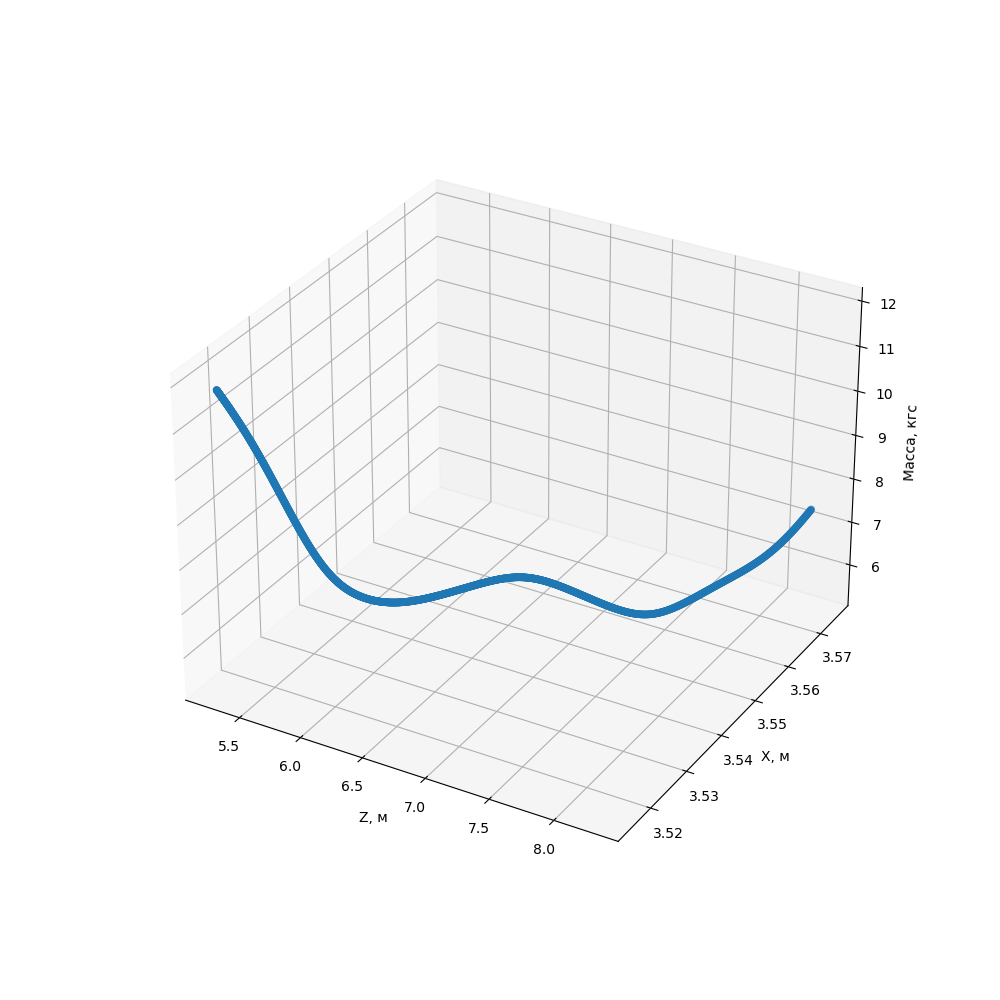

Положение центра приложения сил: 2.68823629342023
Положение центра приложения сил: 2.74275435013371
Положение центра приложения сил: 2.76019363043892
Положение центра приложения сил: 2.81021948104900
Положение центра приложения сил: 2.88364444773360
Положение центра приложения сил: 2.88258475442560
Положение центра приложения сил: 2.91737405576724
Положение центра приложения сил: 2.92472059716385
Положение центра приложения сил: 2.98652697810092
Положение центра приложения сил: 3.04590349224732


In [38]:
"""Считаем элерон"""
#Считаем распределение силы а на каждую хорду по размаху
grad_F=qmf.grad_Force_along_horde(pds_ras, xl_eler, delta_z_eler)

#Получаем Qy и Mz на каждую хорду от аэродинамики
forces_eler, moments_eler = qmf.Forces(grad_F, points, spl_str)

#Получаем распределение массы и ее ЦМ по размаху
dist_cm_eler_m, dist_cm_eler_z, dist_cm_eler_x = md.mass_distribution_func('Распределение_масс_крыло.xlsx', 'X, м', 'x', 'Z, м', 'z', 'Элерон', start_ord, finish_ord)

#Получаем конкретно массы и ее ЦМ в каждом сечении
cm_z, cm_x, cm_m = cf.center_from_mass_dist(dist_cm_eler_z, dist_cm_eler_x, dist_cm_eler_m, xl_eler)

#Считаем координату центра приложения Qy от аэродинамики в каждом сечении
center_of_force = cf.center_force_func(grad_F)

#Считаем Qy с учетом массы
sum_Qy = cf.sum_Qy(cm_m, forces_eler)

#Считаем Mz с учетом массы
sum_Mz = cf.sum_Mz(moments_eler, center_of_force, cm_m, 'Элерон')

In [41]:
#получаем распределение сил на каждую лямку
F, check = ofos.force_on_straps(sum_Qy, sum_Mz, 'Элерон')

0
[[1, 1], [0.9731018250000001, 1.1811018250000003]]
[42.4581846260378, 48.8390631143976]


C:\Users\MI\anaconda3\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


Проверка:  [0.373776453322755 -0.316464207751743]
Погрешность %:  [0.880340166719074, -0.647973543248515]
[9.934175444787641, 32.8977856345729]
1
[[1, 1], [0.9361754833333329, 1.129550483333333]]
[50.2103966473198, 52.1994307612240]
Проверка:  [0 1.42108547152020e-14]
Погрешность %:  [-1.11022302462516e-14, 2.22044604925031e-14]
[23.352279457605242, 26.858117189714577]
2
[[1, 1], [0.8943257999999998, 1.0730757999999998]]
[57.2193962655573, 55.1834125965787]
Проверка:  [-7.10542735760100e-15 0]
Погрешность %:  [-1.11022302462516e-14, 0]
[34.78230392504165, 22.437092340515676]
3
[[1, 1], [0.8523313124999996, 1.0164563124999995]]
[44.5544266126325, 42.0688156864399]
Проверка:  [0 7.10542735760100e-15]
Погрешность %:  [0, 2.22044604925031e-14]
[19.611957311734315, 24.94246930089823]
4
[[1, 1], [0.8104816291666666, 0.9599816291666663]]
[45.2612449705418, 40.6686864964888]
Проверка:  [-7.10542735760100e-15 -7.10542735760100e-15]
Погрешность %:  [-1.11022302462516e-14, -2.22044604925031e-14]


C:\Users\MI\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Проверка:  [0.377213600752910 -0.417499392221043]
Погрешность %:  [1.07990529055177, -1.34777735248401]
[9.943689769474192, 25.363772257061736]
6
[[1, 1], [0.7266374583333328, 0.8468874583333332]]
[43.6546974642175, 31.4417170149899]
Проверка:  [-0.698117396066522 0.960750630263092]
Погрешность %:  [-1.59918046995686, 3.05565573853697]
[33.072110331440086, 9.884469736710868]
7
[[1, 1], [0.6847877749999998, 0.7904127750000001]]
[34.0590428090145, 23.9517528863452]
Проверка:  [-0.197888388150155 0.288977688233643]
Погрешность %:  [-0.581015706342103, 1.20649912181745]
[23.89167768918406, 9.96947673168033]
8
[[1, 1], [0.6429380916666667, 0.7339380916666665]]
[28.9582028235417, 19.8542283427604]
Проверка:  [7.10542735760100e-15 0]
Погрешность %:  [4.44089209850063e-14, 0]
[15.37692061149574, 13.581282212046002]
9
